This notebook is about __Random Forest__ performance in __full phase__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from plotting import plot_model_partial_dependency
from common import OUTPUTPATH
from models import random_forest_pcc
import data

In [2]:
# estimators here
STATE = np.random.RandomState(seed=1000)
random_forest_pcc.fit(data.x1, data.y)

In [3]:
fitted_models = random_forest_pcc.fitted_

Text(0.5, 1.0, 'Sphere Feature Importance')

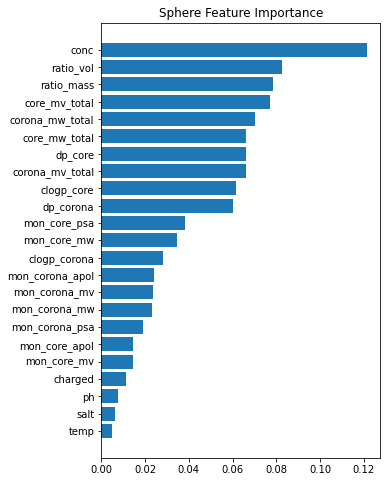

In [4]:
all_columns = data.predictors + data.targets
data1 = pd.concat([data.x1, data.y], axis=1)

sorted_idx = fitted_models[0].feature_importances_.argsort()
plt.figure(figsize=(5,8))
plt.barh(data1.columns[:-4][sorted_idx], fitted_models[0].feature_importances_[sorted_idx])
plt.title("Sphere Feature Importance")

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


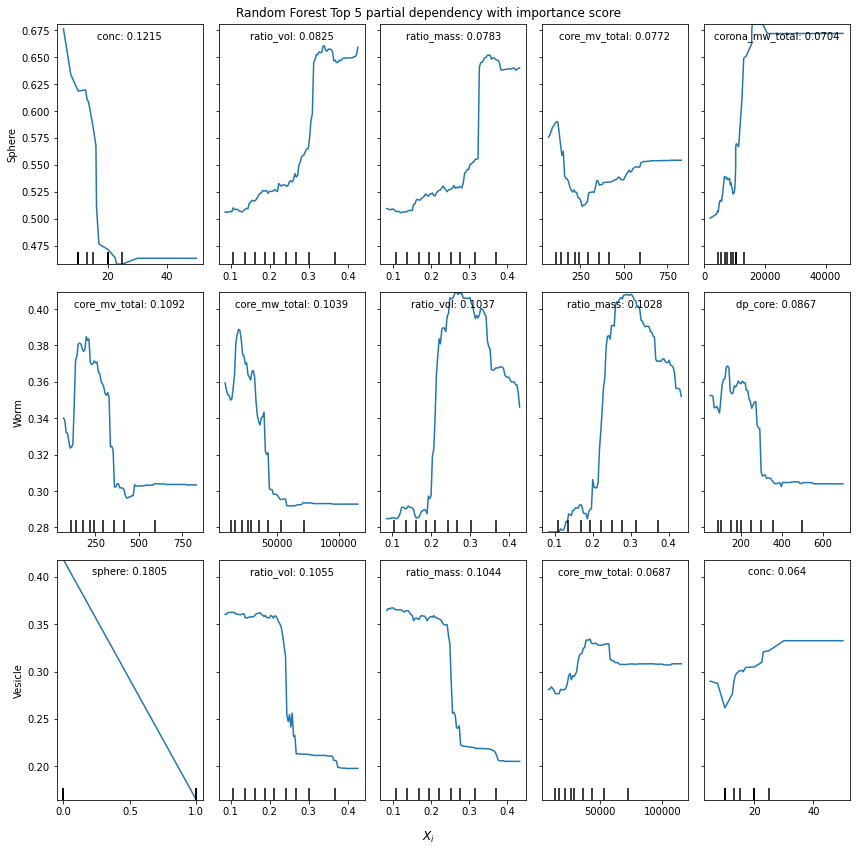

In [5]:
num_importance = 5
plot_model_partial_dependency(random_forest_pcc.fitted_, data1, num_importance)
plt.suptitle('Random Forest Top {} partial dependency with importance score'.format(num_importance))
plt.savefig(os.path.join(OUTPUTPATH, 'Random_Forest_Top_5_partial_dependency.pdf'), bbox_inches='tight', pad_inches=0)
plt.show()